## Two Samples, using Rank-Order Methods
If the underlying samples are not normal, the medians/centers of two samples are compared using a Mann-Whitney test. The following example is taken from Riffenburgh's book, *Statistics in Medicine*, page 234.

### Removal of Hardware in Broken Ankle Repair
An orthopedist installs hardware in 19 broken ankles. After healing, he removes the hardware in 9 of the patients, randomly selected, and
leaves it permanently in place in the remaining 10. He judges the post-operative percent functionality of the ankle joint and asks, “Is the average functionality different for the two treatments?” Because either one might be the better, his test is **two-sided**. His data are as follows. 

In [1]:
# Group that did not remove hardware
Group0 = [45, 72, 85, 90, 93, 95, 95, 98, 99, 100]

# Group that removed the hardware
Group1 = [35, 63, 65, 70, 75, 78, 80, 90, 100]

A quick frequency plot of the data shows that they are far from normal, so he uses a
rank test.

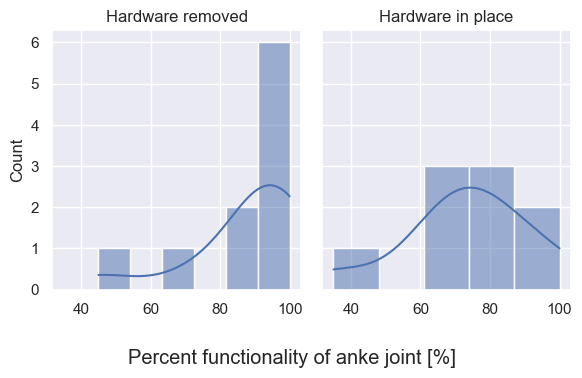

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(6.0, 3.8))

sns.histplot(data=Group0, kde=True, ax=axs[0])
axs[0].set_title("Hardware removed")

sns.histplot(data=Group1, kde=True, ax=axs[1])
axs[1].set_title("Hardware in place")

fig.supxlabel("Percent functionality of anke joint [%]")
fig.tight_layout()

We then initialize a `MeansTester` object, using the data collected from the patients as input arguments. We also set the `alternative` parameter to 'two-sided' to carry out a two-tailed test.

In [3]:
from means_testing import MeansTester

StatToolbox = MeansTester(Group0, Group1, alternative='two-sided')

We then call the `test_means()` method, and set `verbose` to True, to have a better look of what is happening.

In [4]:
StatToolbox.test_means(verbose=True)

Checking if samples have equal variances DONE!
 - test_type : F-Test
 - stat      : 1.174026773349746
 - p         : 0.4049238773621948
Samples have unequal variances: No

Checking if samples are drawn from normal distributions DONE!
Samples #1 are NOT drawn from a normal distribution: True
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.7419286185479413), 'p': np.float64(0.0028460250878116766)}
Samples #2 are NOT drawn from a normal distribution: False
 - {'test_type': 'Shapiro-Wilk', 'stat': np.float64(0.949461435961673), 'p': np.float64(0.6841493083394545)}
At least one sample not drawn from a normal distribution: Yes

Comparing means of samples DONE!
 - test_type : Mann-Whitney
 - stat      : 1.8779421361337698
 - p         : 0.060389081309270225
Samples are significantly different: No



The computed p-value is 0.06 which is just shy of our significant level of 0.05 and hence, we reject the null hypothesis::

> There is no significant difference between when the hardware is removed or retained.

To double check the computed results, refer to Riffenburgh's book, *Statistics in Medicine*, page 233-235.

Note that we test the median of `Group0` (first group in input argument), against `Group1` (second group in input argument). The implementation of the Mann-Whitney test is Riffenburgh's book, however, always sets the first group as the smaller group. This explains the different sign of the computed statistic on page 233.